### импорты

In [1]:
import matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import json

In [3]:
%matplotlib notebook

In [15]:
a_file = open("config.json", "r")
json_object = json.load(a_file)
a_file.close()

json_object["StartCondition"]["duration"] = 1000
json_object["StartCondition"]["dt"] = 0.01
json_object["StartCondition"]["x_0"] = 10
json_object["StartCondition"]["v_0"] = 0
json_object["StartCondition"]["w"] = 1

json_object["StartCondition"]["duration"] = 10
json_object["StartCondition"]["dt"] = 0.01
json_object["PhysicalPendulum"]["teta_0"] = 0.1
json_object["PhysicalPendulum"]["d(teta_0)/dt"] = 0.0
json_object["PhysicalPendulum"]["lambda"] = 0.1
json_object["PhysicalPendulum"]["g"] = 9.8
json_object["OUTPATH"] = "/home/starman/CLionProjects/RangiCut/PhysPend1.txt"

a_file = open("config.json", "w")
json.dump(json_object, a_file)
a_file.close()

subprocess.run(["./main","config.json"])

CompletedProcess(args=['./main', 'config.json'], returncode=0)

# графики

### Точное решение

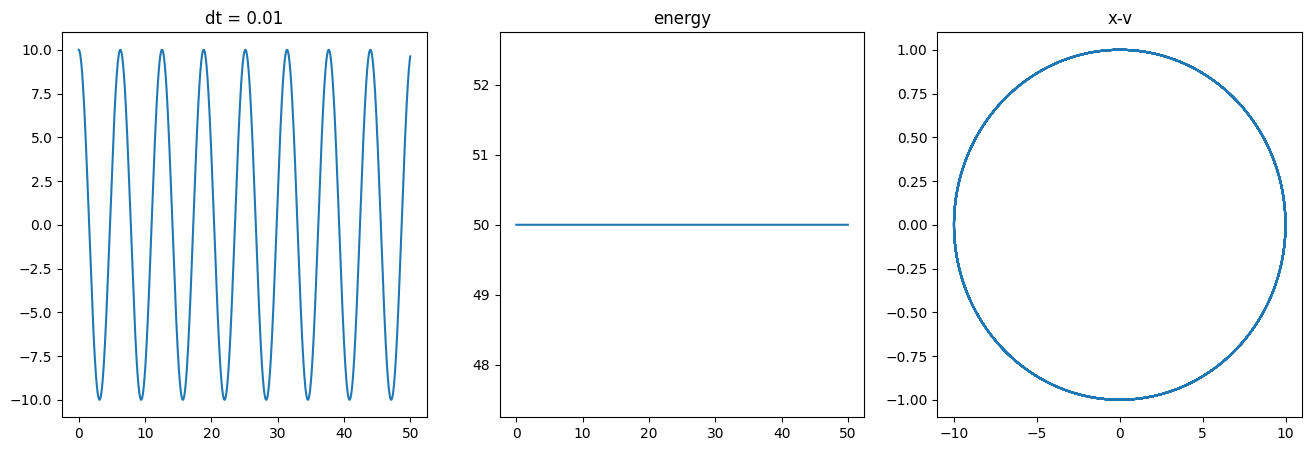

In [18]:
f = open('/home/starman/CLionProjects/RangiCut/preciseSolution.txt', 'r')
conv = {
    0: lambda x: float(x),
    1: lambda x: float(x),
    2: lambda x: float(x),
    3: lambda x: float(x),
}
arr_pr = np.loadtxt(f, delimiter=" ", converters=conv)

t_pr, x_pr, energy_pr, v_pr = [], [], [], []

for i in arr_pr:
    t_pr.append(i[0])
    x_pr.append(i[1])
    energy_pr.append(i[2])
    v_pr.append(i[3])  

lines = 1
columns = 3
fig, ax = plt.subplots(lines, columns, figsize=(16, 5))


plt.subplot(lines, columns, 1)
plt.plot(t_pr, x_pr)
plt.title('dt = ' + str(t[1]))
plt.subplot(lines, columns, 2)
plt.plot(t_pr, energy_pr)
plt.title('energy')
plt.subplot(lines, columns, 3)
plt.plot(x_pr, v_pr)
plt.title('x-v')

plt.show()

### График из теста

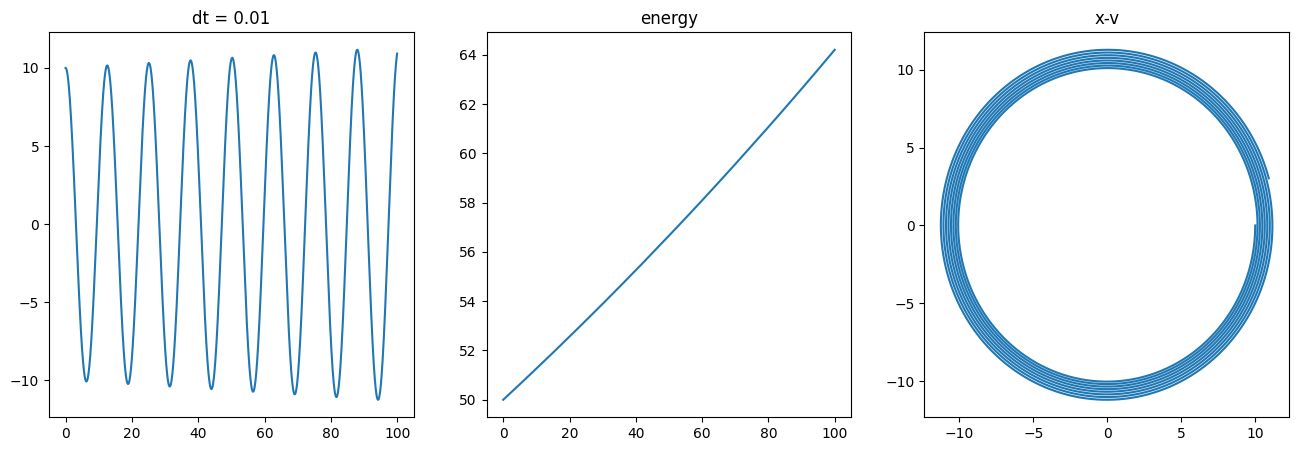

In [15]:
f = open('/home/starman/CLionProjects/RangiCut/data.txt', 'r')
conv = {
    0: lambda x: float(x),
    1: lambda x: float(x),
    2: lambda x: float(x),
    3: lambda x: float(x),
}
arr = np.loadtxt(f, delimiter=" ", converters=conv)

t, x, energy, v = [], [], [], []

for i in arr:
    t.append(i[0])
    x.append(i[1])
    energy.append(i[2])
    v.append(i[3])   

lines = 1
columns = 3
fig, ax = plt.subplots(lines, columns, figsize=(16, 5))

plt.subplot(lines, columns, 1)
plt.plot(t, x)
plt.title('dt = ' + str(t[1]))
plt.subplot(lines, columns, 2)
plt.plot(t, energy)
plt.title('energy')
plt.subplot(lines, columns, 3)
plt.plot(x, v)
plt.title('x-v')

plt.show()

## Обратимость во времени Хойн + Кэхэн
#### оранжевая - вперед
#### синяя - назад

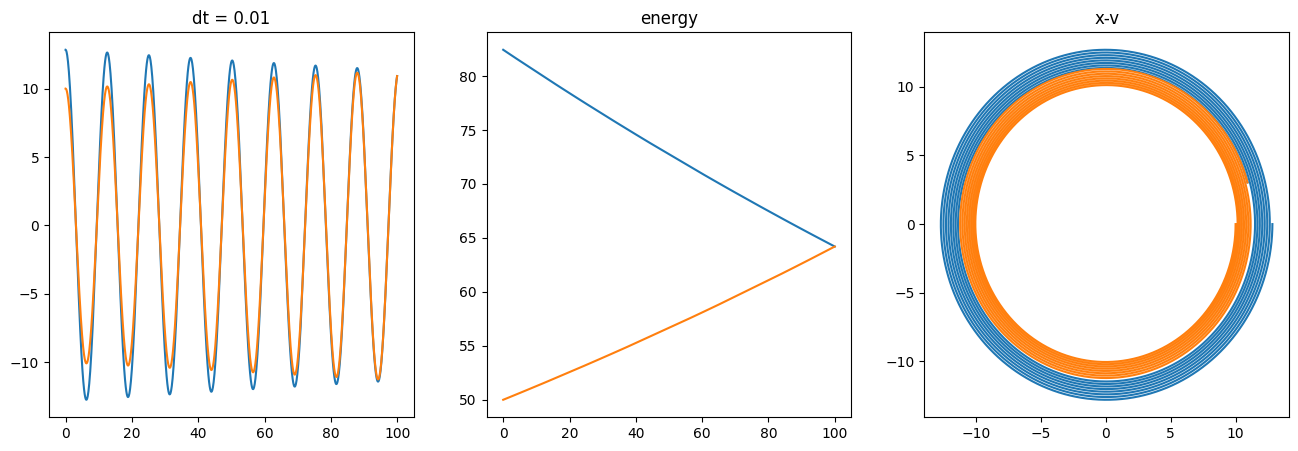

In [11]:
f = open('/home/starman/CLionProjects/RangiCut/data.txt', 'r')
conv = {
    0: lambda x: float(x),
    1: lambda x: float(x),
    2: lambda x: float(x),
    3: lambda x: float(x),
}
arr = np.loadtxt(f, delimiter=" ", converters=conv)

f = open('/home/starman/CLionProjects/RangiCut/timeReverse.txt', 'r')
conv = {
    0: lambda x: float(x),
    1: lambda x: float(x),
    2: lambda x: float(x),
    3: lambda x: float(x),
}
arr_tr = np.loadtxt(f, delimiter=" ", converters=conv)

t, x, energy, v = [], [], [], []
t_tr, x_tr, energy_tr, v_tr = [], [], [], []
for i in arr:
    t.append(i[0])
    x.append(i[1])
    energy.append(i[2])
    v.append(i[3])

for i in arr_tr:
    t_tr.append(i[0])
    x_tr.append(i[1])
    energy_tr.append(i[2])
    v_tr.append(i[3])    

lines = 1
columns = 3
fig, ax = plt.subplots(lines, columns, figsize=(16, 5))

plt.subplot(lines, columns, 1)
plt.plot(t_tr, x_tr)
plt.title('dt = ' + str(t_tr[1]))
plt.subplot(lines, columns, 2)
plt.plot(t_tr, energy_tr)
plt.title('energy')
plt.subplot(lines, columns, 3)
plt.plot(x_tr, v_tr)
plt.title('x-v')

plt.subplot(lines, columns, 1)
plt.plot(t, x)
plt.title('dt = ' + str(t[1]))
plt.subplot(lines, columns, 2)
plt.plot(t, energy)
plt.title('energy')
plt.subplot(lines, columns, 3)
plt.plot(x, v)
plt.title('x-v')

plt.show()

### разница начальных координат и энергии в зависимости от разбиения по времени

[85.9023, 83.2411, 83.3381, 83.4352, 83.5325, 86.4091, 86.5099, 86.6109, 83.2877, 86.8233, 83.4921, 84.237, 87.1381, 83.7949, 83.9026, 87.4645, 84.1088, 87.6796, 87.7924, 87.9055, 84.533, 84.642, 84.7511, 84.8604, 84.9698, 85.0795, 85.1893, 85.2993, 88.9313, 89.0462, 84.9109, 85.751, 89.4024, 85.2507, 89.6444, 85.4815, 89.8872, 90.0142, 85.8343, 90.2582, 90.3858, 90.5137, 90.6418, 86.4329, 86.5553, 91.0273, 91.1563, 91.2855, 91.4149, 86.365, 91.6852, 91.8153, 86.7435, 92.0871, 87.0004, 92.3599, 92.5021, 87.3926, 87.5273, 92.9194, 93.0627, 93.2063, 93.3501, 93.4942, 93.6386, 87.5745, 88.6138, 94.0845, 87.9917, 89.0361, 94.5331, 94.6907, 88.5588, 94.9955, 95.1541, 88.9924, 89.141, 89.2899, 89.4392, 89.5887, 89.7385, 96.2729, 96.4341, 89.2034, 96.7689, 89.5133, 97.1052, 89.8245, 97.4429, 97.6181, 97.7937, 90.4616, 90.6244, 98.3228, 98.5, 98.6775, 90.2022, 91.4551, 99.2244, 90.7023, 90.8771, 99.7869, 91.2168, 91.3927, 91.5691, 91.7458, 91.923, 92.1006, 101.143, 101.339, 91.4617, 101.744, 9

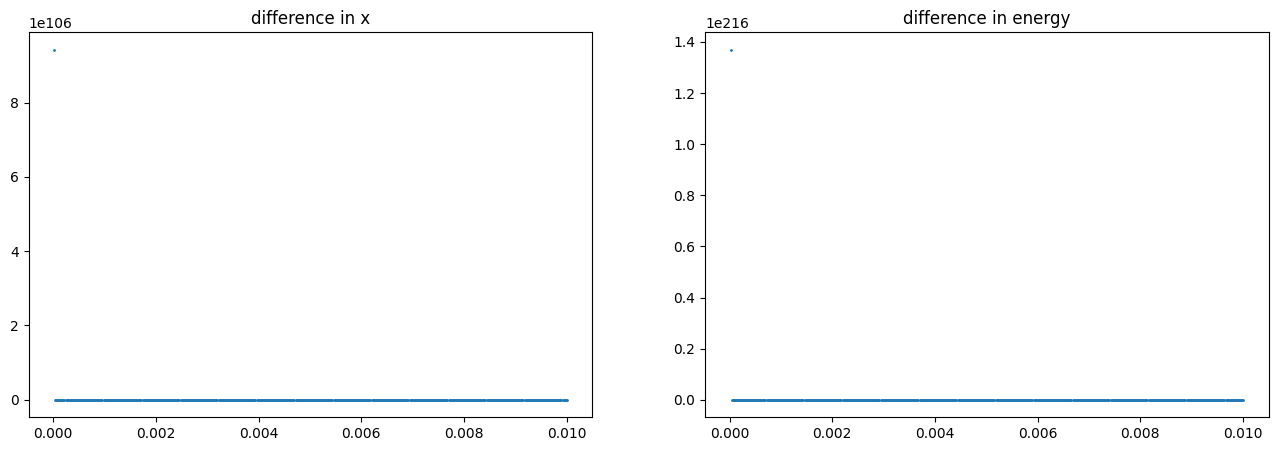

In [8]:
f = open('/home/starman/CLionProjects/RangiCut/TimeReverseError.txt', 'r')
conv = {
    0: lambda x: float(x),
    1: lambda x: float(x),
    2: lambda x: float(x),
    #3: lambda x: float(x),
}
arr = np.loadtxt(f, delimiter=" ", converters=conv)

t, x, energy, v = [], [], [], []
for i in arr:
    t.append(i[0])
    x.append(i[1])
    energy.append(i[2])
    #v.append(i[3])

lines = 1
columns = 2
fig, ax = plt.subplots(lines, columns, figsize=(16, 5))

plt.subplot(lines, columns, 1)
plt.scatter(t, x, 1)
plt.title('difference in x')
plt.subplot(lines, columns, 2)
plt.scatter(t, energy, 1)
plt.title('difference in energy')
print(energy)
plt.show()

### Ошибка без суммирования Кэхэна

<IPython.core.display.Javascript object>


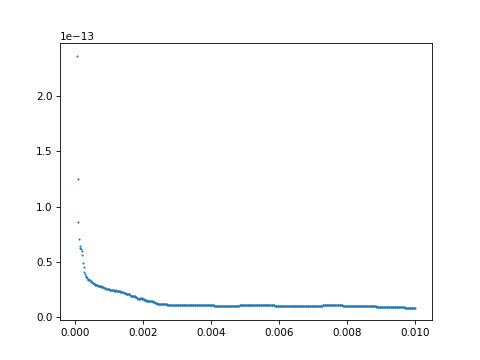

In [30]:
f = open('/home/starman/CLionProjects/RangiCut/TimeError.txt', 'r')
conv = {
    0: lambda x: float(x),
    1: lambda x: float(x),
}
arr = np.loadtxt(f, delimiter=" ", converters=conv)

t, x, energy, v = [], [], [], []
t_pr, x_pr, energy_pr, v_pr = [], [], [], []
for i in arr:
    t.append(i[0])
    x.append(i[1])

lines = 1
columns = 1
fig, ax = plt.subplots(lines, columns)
plt.subplot(lines, columns, 1)
plt.scatter(t, x, 1)

plt.show()

## Рунге Кутта

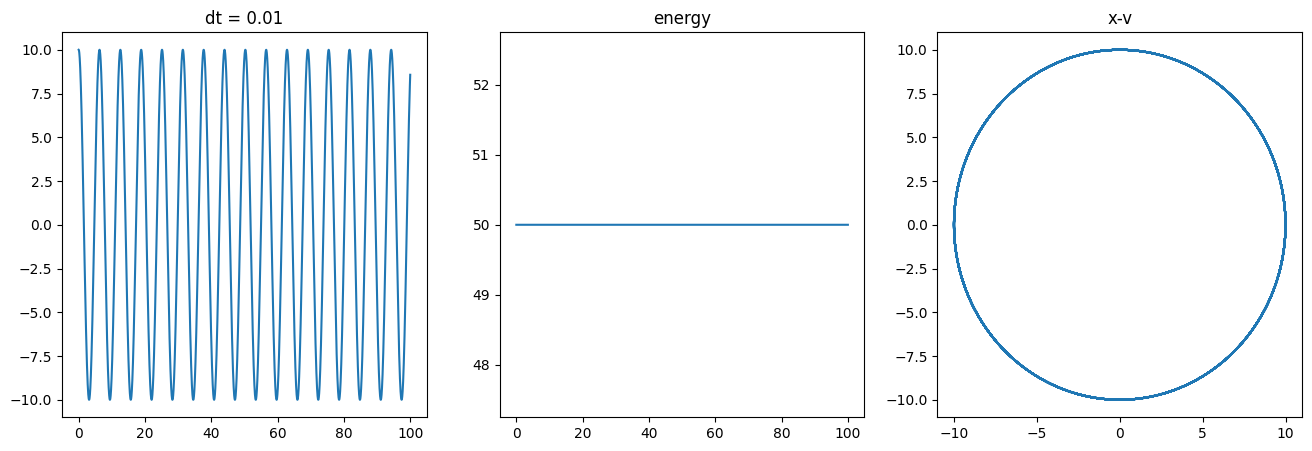

In [5]:
f = open('/home/starman/CLionProjects/RangiCut/RungeKuttData.txt', 'r')
conv = {
    0: lambda x: float(x),
    1: lambda x: float(x),
    2: lambda x: float(x),
    3: lambda x: float(x),
}
arr = np.loadtxt(f, delimiter=" ", converters=conv)

t, x, energy, v = [], [], [], []

for i in arr:
    t.append(i[0])
    x.append(i[1])
    energy.append(i[2])
    v.append(i[3])   

lines = 1
columns = 3
fig, ax = plt.subplots(lines, columns, figsize=(16, 5))

plt.subplot(lines, columns, 1)
plt.plot(t, x)
plt.title('dt = ' + str(t[1]))
plt.subplot(lines, columns, 2)
plt.plot(t, energy)
plt.title('energy')
plt.subplot(lines, columns, 3)
plt.plot(x, v)
plt.title('x-v')
plt.savefig('RungeKuttaGraph.png')

plt.show()

## Физический маятник

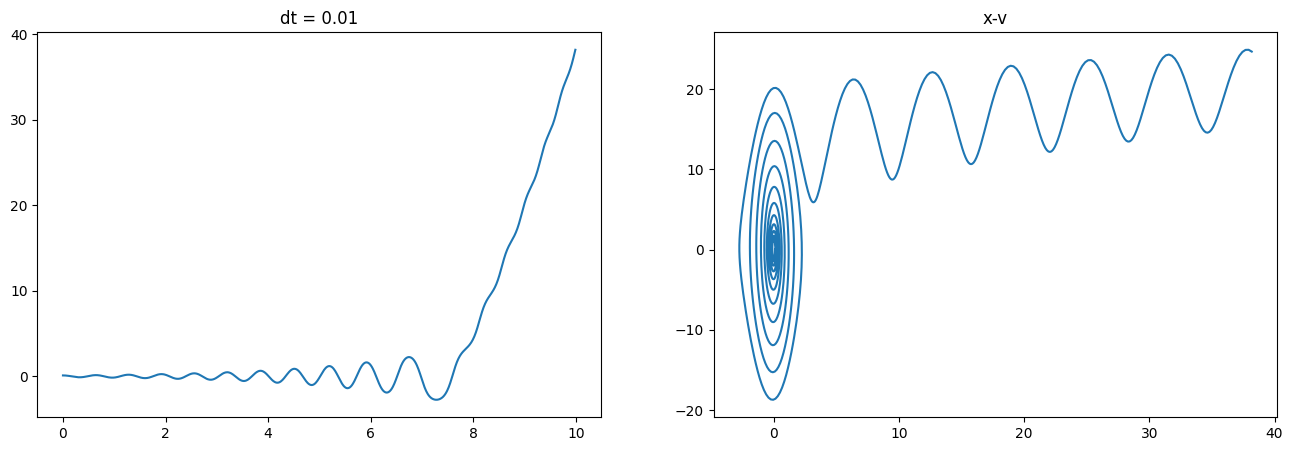

In [16]:
f = open('/home/starman/CLionProjects/RangiCut/PhysPend1.txt', 'r')
conv = {
    0: lambda x: float(x),
    1: lambda x: float(x),
    2: lambda x: float(x),
}
arr = np.loadtxt(f, delimiter=" ", converters=conv)

t, x, v = [], [], []

for i in arr:
    t.append(i[0])
    x.append(i[1])
    v.append(i[2])   

lines = 1
columns = 2
fig, ax = plt.subplots(lines, columns, figsize=(16, 5))

plt.subplot(lines, columns, 1)
plt.plot(t, x)
plt.title('dt = ' + str(t[1]))
plt.subplot(lines, columns, 2)
plt.plot(x, v)
plt.title('x-v')
#plt.savefig('RungeKuttaGraph.png')

plt.show()